# Insurance Prediction Using Linear Regression

### Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df=pd.read_csv("167541498631660ec2379f8793842aa5b168a_.csv")

### Understanding Dataset

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Observartions

# We have 4 columns with numeric datas out of 7 total columns & 1338 datas with no null values

# Min age: 18, Max age : 64
# Min BMI: 15, Max BMI : 53

# Min charges: 1121 to Max Charges: 63770

## Visualization 

Text(0, 0.5, 'charges')

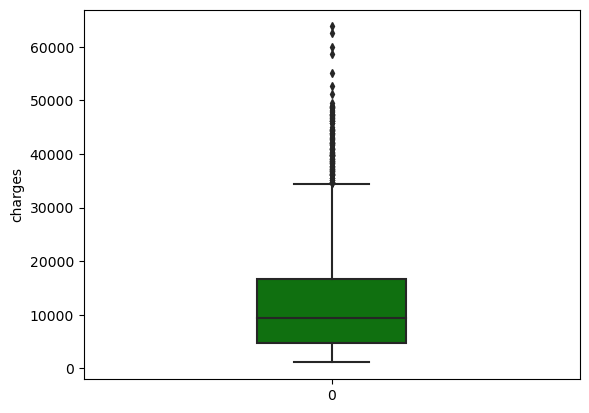

In [9]:
import seaborn as sns
sns.boxplot(df["charges"],color="g", width=0.3,fliersize=4)
plt.ylabel("charges")


<Axes: xlabel='bmi', ylabel='charges'>

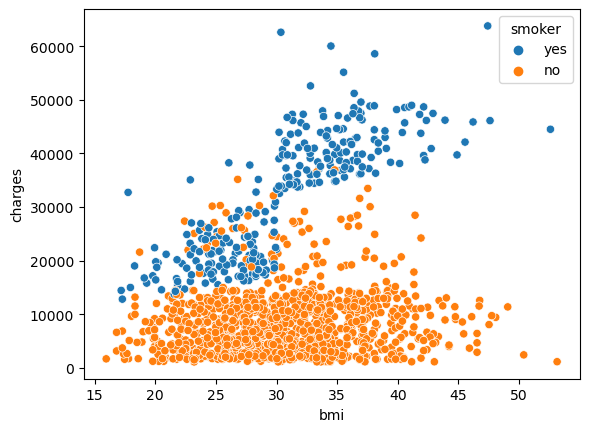

In [10]:
sns.scatterplot(data=df,x=df["bmi"],y=df["charges"],hue="smoker")

In [11]:
#Insight 1: Insurance charges have relation with smoking habit and bmi

<Axes: xlabel='bmi', ylabel='charges'>

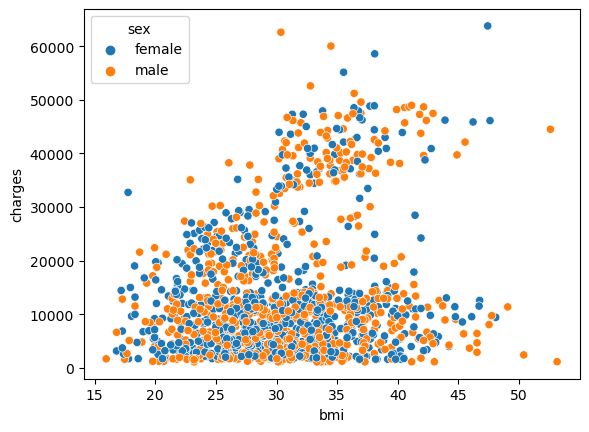

In [12]:
sns.scatterplot(data=df,x=df["bmi"],y=df["charges"],hue="sex")

In [13]:
#Insight 2: Insurance charges have relation with bmi but not with Sex

<Axes: xlabel='age', ylabel='charges'>

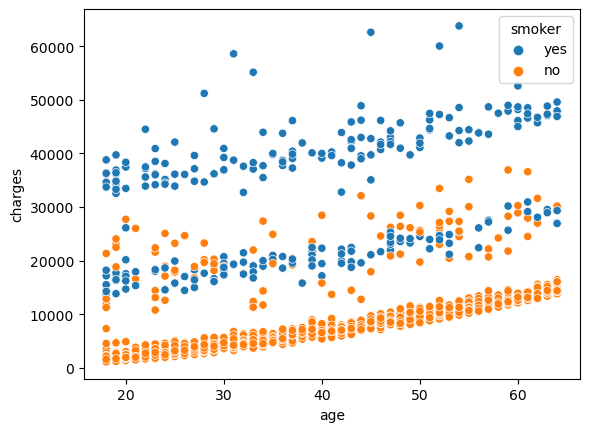

In [14]:
sns.scatterplot(data=df,x=df["age"],y=df["charges"],hue="smoker")

In [15]:
#Insight 3: Insurance charges have relation with Age and Smoking habit

<Axes: xlabel='bmi', ylabel='charges'>

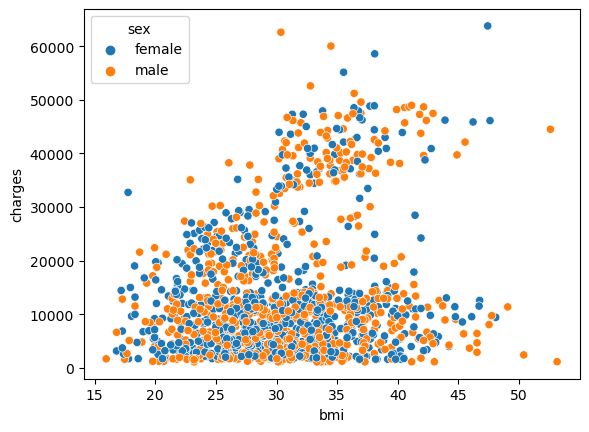

In [16]:
sns.scatterplot(data=df,x=df["bmi"],y=df["charges"],hue="sex")

In [17]:
#Insight 4: Insurance charges have relation with age but not with sex

Text(0, 0.5, 'charges')

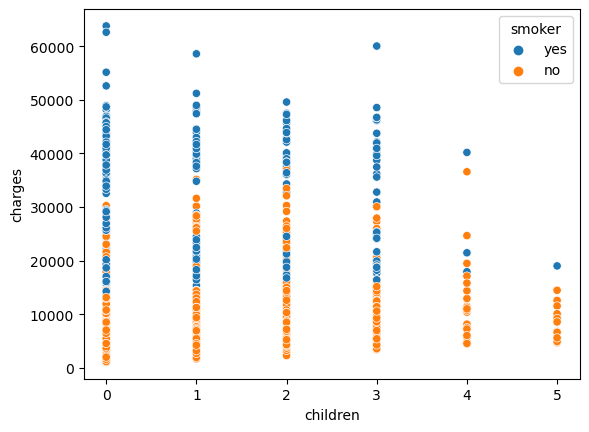

In [18]:
sns.scatterplot(data=df,x=df["children"],y=df["charges"],hue="smoker")
plt.xlabel("children")
plt.ylabel("charges")

In [19]:
#Insight 5: Insurance charges have no relation with number of childrens

<Axes: xlabel='bmi', ylabel='charges'>

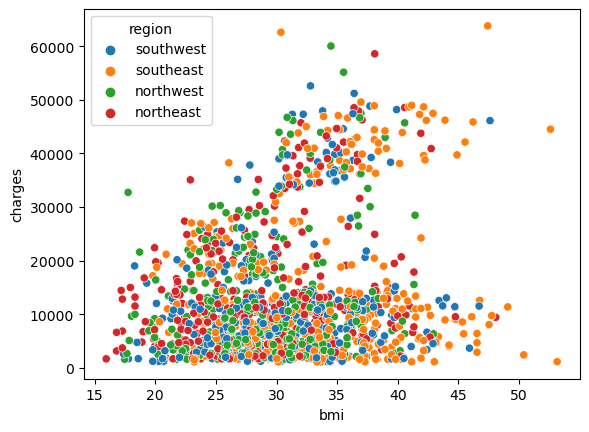

In [20]:
sns.scatterplot(data=df,x=df["bmi"],y=df["charges"],hue="region")

<Axes: xlabel='region', ylabel='charges'>

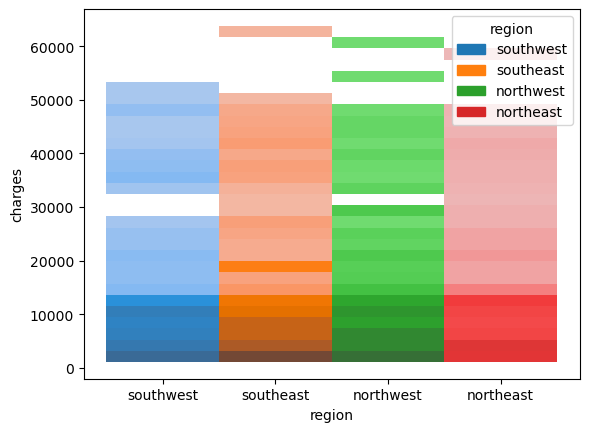

In [21]:
sns.histplot(data=df, x="region", y=df["charges"], hue ="region")

In [22]:
#Insight 6: Insurance charges have no relation with Region the person belong to

In [23]:
corr=df.corr()
corr

C:\Users\DELL\AppData\Local\Temp\ipykernel_17396\3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


No such correlation observed in number of Childrens Vs charges,
                                          Region Vs Charges
                                          

### Data cleaning

In [24]:
filtered_df = df[['age','bmi', 'smoker', 'charges']]
df2=filtered_df
df2

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520
...,...,...,...,...
1333,50,30.970,no,10600.54830
1334,18,31.920,no,2205.98080
1335,18,36.850,no,1629.83350
1336,21,25.800,no,2007.94500


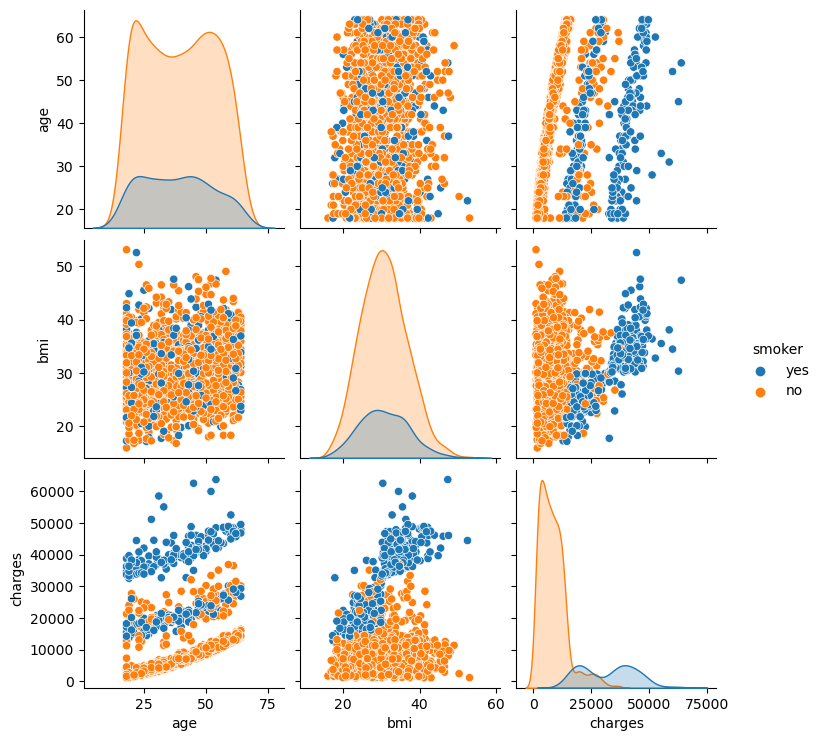

In [25]:
sns.pairplot(df2,hue="smoker")

In [26]:
# Insights 

#Insight 1: Insurance charges have relation with smoking habit and bmi
#Insight 2: Insurance charges have relation with bmi but not with Sex
#Insight 3: Insurance charges have relation with Age and Smoking habit
#Insight 4: Insurance charges have relation with age but not with sex
#Insight 5: Insurance charges have no relation with number of childrens
#Insight 6: Insurance charges have no relation with Region the person belong to

### Data Encoding

In [27]:
df2['smoker'].replace(['no', 'yes'],[0, 1], inplace=True)
df2

C:\Users\DELL\AppData\Local\Temp\ipykernel_17396\2641279492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['smoker'].replace(['no', 'yes'],[0, 1], inplace=True)


,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


## Machine Learning Model Creation

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [29]:
X=df2[['age','bmi','smoker']]
y=df2["charges"]

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## OLS using statsmodel Library

In [31]:
import statsmodels.api as sm

In [32]:
x_train_1= sm.add_constant(x_train)
model=sm.OLS(y_train,x_train_1)

In [33]:
result=model.fit()
print(result)

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1038.
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          1.24e-315
Time:                        12:33:59   Log-Likelihood:                -10844.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1066   BIC:                         2.172e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.105e+04   1046.110    -10.566      0.000   -1.31e+04   -9000.099
age          258.9624     13.472     19.222      0.000     232.527     285.398
bmi          303.3720     30.720      9.875      0.000     243.094     363.651
smoker      2.372e+04    462.304     51.316      0.000    2.28e+04    2.46e+04
==============================================================================
Omnibus:                      238.903   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.750
Skew:                           1.212   Prob(JB):                    6.93e-120
Kurtosis:                       5.535   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
st_inter,st_coef1, st_coef2, st_coef3 = result.params
st_inter,st_coef1, st_coef2, st_coef3

(-11052.767949478204, 258.96243108687725, 303.3720468662867, 23723.48386216958)

## OLS using sklearn library

In [36]:
# Fit the model to the data
reg=LinearRegression().fit(X, y)

# Print the coefficients of the model

constant=reg.intercept_
coef1,coef2,coef3=reg.coef_
print(f"Regression coef's are: {coef1,coef2,coef3}")
print(f"Intercept is : {constant}")

#Y - Prediction

y_pred = reg.predict(x_test)

#Accuracy score
score = reg.score(x_test,y_test)
print(f"accuracy score : {(score * 100)} %")

Regression coef's are: (259.54749155186295, 322.6151328190812, 23823.684495308837)
Intercept is : -11676.830425187785
accuracy score : 75.77486765813987 %


Accuracy score using R-Square Method

In [37]:
import sklearn
from sklearn.metrics import r2_score
r=sklearn.metrics.r2_score(y_test,y_pred)
r2_acc= r*100
print(f"accuracy score by R square is :{r2_acc}%")

accuracy score by R square is :75.77486765813987%


## Manual prediction Testing

In [38]:
# calculating for random data
def inc_amt(age,bmi,s):
    amt=constant+coef1*age+coef2*bmi+coef3*s
    return amt
    
print("Hi.. Lets get you a insurance plan please provide your details")
name=input("\nGive your name or Nic Name : ")
age=int(input("\nYour age : "))
bmi=int(input("Your bmi : "))
smoker=input("\nDo have smoking habit? \n if yes give y else no: ")
if (smoker == "y" or smoker == "Y"):
    s=1
    print("\nHey...!")
else:
    s=0
    print("\nHey...! thats great ..!")
    
amount=inc_amt(age,bmi,s)
print(f"\nWe are happy to serve you! \nyour approx premium is : {amount}")


Hi.. Lets get you a insurance plan please provide your details

Give your name or Nic Name : Rio

Your age : 26
Your bmi : 27

Do have smoking habit? 
 if yes give y else no: Y

Hey...!

We are happy to serve you! 
your approx premium is : 27605.69743658468
